****


<center>
<b>Data</b>
</center>

Going to start by importing two data sets, the first is approximately two years worth of transactions from a recently married couple and the second dataset is approximately five years worth of sales from a small business. These sets will be cleaned and examined and then used to create machine learning models with the goal of the end user being able to use the results to help manage their finances in some innovative ways. 
     

In [171]:

#importing libraries to read the files
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from time import gmtime, strftime 
from pylab import rcParams

#importing libraries to be used in model building
import statsmodels.api as sm
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from statsmodels.tsa.seasonal import seasonal_decompose 

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

from tqdm import tqdm_notebook
from itertools import product

%matplotlib inline



****

In [4]:
#Importing the personal transactions data...
import pandas as pd
df_transactions = pd.read_csv('/Users/natashawyatt/Documents/personal_transactions.csv')

****



<br></br>


In the next few cells we will be taking a closer look at the details of this dataframe to see what needs to be cleaned and what it contains.

<br></br>

****

In [9]:
df_transactions

,Date,Description,Amount,Transaction Type,Category,Account_Name
0,01/01/2018,Amazon,11.11,debit,Shopping,Platinum Card
1,01/02/2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,01/02/2018,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,01/03/2018,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,01/04/2018,Netflix,11.76,debit,Movies & DVDs,Platinum Card
...,...,...,...,...,...,...
801,09/27/2019,Biweekly Paycheck,2250.00,credit,Paycheck,Checking
802,09/28/2019,BP,33.46,debit,Gas & Fuel,Platinum Card
803,09/28/2019,Sheetz,4.27,debit,Gas & Fuel,Platinum Card
804,09/30/2019,Starbucks,1.75,debit,Coffee Shops,Platinum Card


In [6]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              806 non-null    object 
 1   Description       806 non-null    object 
 2   Amount            806 non-null    float64
 3   Transaction Type  806 non-null    object 
 4   Category          806 non-null    object 
 5   Account_Name      806 non-null    object 
dtypes: float64(1), object(5)
memory usage: 37.9+ KB


In [22]:
print(df_transactions.isnull().sum())

Date                0
Description         0
Amount              0
Transaction Type    0
Category            0
Account_Name        0
dtype: int64


In [25]:
df_transactions = df_transactions.drop_duplicates()

In [26]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 0 to 805
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              806 non-null    object 
 1   Description       806 non-null    object 
 2   Amount            806 non-null    float64
 3   Transaction Type  806 non-null    object 
 4   Category          806 non-null    object 
 5   Account_Name      806 non-null    object 
dtypes: float64(1), object(5)
memory usage: 44.1+ KB


<br></br>
***
After a quick look there are no null values and no duplicates. Lets take a closer look at what is is the columns and how they can be used.
***
<br></br>

In [29]:
# Looking at the ends of the date range, just under 2 years worth of transactions....
print(df_transactions['Date'])

0      01/01/2018
1      01/02/2018
2      01/02/2018
3      01/03/2018
4      01/04/2018
          ...    
801    09/27/2019
802    09/28/2019
803    09/28/2019
804    09/30/2019
805    09/30/2019
Name: Date, Length: 806, dtype: object


In [30]:
# Lets see what the descriptions of the transactions include...
print('***********************************')
print(df_transactions['Description'].unique())
print('***********************************')
print(df_transactions['Description'].nunique())
print('***********************************')


***********************************
['Amazon' 'Mortgage Payment' 'Thai Restaurant' 'Credit Card Payment'
 'Netflix' 'American Tavern' 'Hardware Store' 'Gas Company' 'Spotify'
 'Phone Company' 'Shell' 'Grocery Store' 'Biweekly Paycheck' 'Pizza Place'
 'City Water Charges' 'Power Company' 'Starbucks'
 'Internet Service Provider' 'Brunch Restaurant' 'Japanese Restaurant'
 'Barbershop' 'Bojangles' 'Fancy Restaurant' 'Brewing Company'
 'Mexican Restaurant' 'Gas Station' 'BBQ Restaurant' 'BP'
 'Mediterranean Restaurant' 'Steakhouse' 'Belgian Restaurant' "Chili's"
 'Greek Restaurant' 'Amazon Video' 'Chevron' 'Tiny Deli' 'Irish Pub'
 'Blue Sky Market' 'State Farm' 'QuikTrip' "Mike's Construction Co."
 'Liquor Store' 'Movie Theater' 'Italian Restaurant' 'Chick-Fil-A'
 'Go Mart' 'Circle K' "Wendy's" 'Irish Restaurant' 'Conoco' 'Valero'
 'Sushi Restaurant' 'Exxon' 'German Restaurant' 'Seafood Restaurant'
 'Food Truck' 'Latin Restaurant' 'New York Deli' 'Roadside Diner'
 'Bakery Place' 'Best Buy' 

In [31]:
# Making sure there are no other types than debit/credit....
print('***********************************')
print(df_transactions['Transaction Type'].unique())
print('***********************************')
print(df_transactions['Transaction Type'].nunique())
print('***********************************')


***********************************
['debit' 'credit']
***********************************
2
***********************************


In [33]:
# Number of different amounts 
print('***********************************')
print(df_transactions['Amount'].nunique())
print('***********************************')


***********************************
454
***********************************


In [34]:
# Seeing the different categories of transactions...
print('***********************************')
print(df_transactions['Category'].unique())
print('***********************************')
print(df_transactions['Category'].nunique())
print('***********************************')



***********************************
['Shopping' 'Mortgage & Rent' 'Restaurants' 'Credit Card Payment'
 'Movies & DVDs' 'Home Improvement' 'Utilities' 'Music' 'Mobile Phone'
 'Gas & Fuel' 'Groceries' 'Paycheck' 'Fast Food' 'Coffee Shops' 'Internet'
 'Haircut' 'Alcohol & Bars' 'Auto Insurance' 'Entertainment'
 'Food & Dining' 'Television' 'Electronics & Software']
***********************************
22
***********************************


In [37]:
# Looking at account names it looks like money is spent through either a checking account or 1 of 2 credit cards..
print('***********************************')
print(df_transactions['Account_Name'].unique())
print('***********************************')
print(df_transactions['Account_Name'].nunique())
print('***********************************')


***********************************
['Platinum Card' 'Checking' 'Silver Card']
***********************************
3
***********************************


In [56]:
# Lets make sure all debits and credits are what we want them to be....

# Ensure 'Amount' is numeric
df_transactions['Amount'] = pd.to_numeric(df_transactions['Amount'], errors='coerce')

# Aggregate transactions by 'Transaction Type' and 'Category'
aggregated_transactions = df_transactions.groupby(['Transaction Type', 'Category'])['Amount'].agg(['sum', 'count']).reset_index()

# Display aggregated transactions
print(aggregated_transactions)
print('***********************')
# List unique categories for 'Credit'
credit_categories = aggregated_transactions[aggregated_transactions['Transaction Type'] == 'credit']['Category'].unique()

print('***********************')
print("Unique Categories under 'Credit':", credit_categories)
print('***********************')



   Transaction Type                Category       sum  count
0            credit     Credit Card Payment  30519.76     72
1            credit                Paycheck  93750.00     46
2             debit          Alcohol & Bars    539.13     25
3             debit          Auto Insurance   1350.00     18
4             debit            Coffee Shops    115.54     31
5             debit     Credit Card Payment  33041.36     71
6             debit  Electronics & Software    719.00      4
7             debit           Entertainment      9.62      1
8             debit               Fast Food    330.63     16
9             debit           Food & Dining     77.75      2
10            debit              Gas & Fuel   1715.17     52
11            debit               Groceries   2795.21    105
12            debit                 Haircut    378.00     13
13            debit        Home Improvement  19092.87     36
14            debit                Internet   1570.88     21
15            debit     

In [57]:
# A more detailed inspection, to filter transactions that are 'credit' but not income
non_income_credits = df_transactions[(df_transactions['Transaction Type'] == 'credit') & (~df_transactions['Category'].str.contains("Income", case=False))]
print(non_income_credits)

           Date          Description   Amount Transaction Type  \
3    01/03/2018  Credit Card Payment  2298.09           credit   
13   01/12/2018    Biweekly Paycheck  2000.00           credit   
20   01/19/2018    Biweekly Paycheck  2000.00           credit   
22   01/22/2018  Credit Card Payment   554.99           credit   
23   01/22/2018  Credit Card Payment   309.81           credit   
..          ...                  ...      ...              ...   
784  09/13/2019    Biweekly Paycheck  2250.00           credit   
788  09/16/2019  Credit Card Payment    90.57           credit   
790  09/17/2019  Credit Card Payment   186.13           credit   
796  09/20/2019  Credit Card Payment     9.43           credit   
801  09/27/2019    Biweekly Paycheck  2250.00           credit   

                Category   Account_Name  
3    Credit Card Payment  Platinum Card  
13              Paycheck       Checking  
20              Paycheck       Checking  
22   Credit Card Payment  Platinum Card

<b> <center>A Few changes</center></b>
***
After looking at the results of these last few cells we see there is something that needs to be addressed to make sure optimal accuracy moving forward. Under 'Description' we see two different types of credits, paychecks and credit card payments. Obvioulsy paying cash towards a credit card is not income, but sometimes this is listed as such since paying the card down increases the balance you can spend with. In our case we want this to be listed as a debit and only income to be listed as a credit. This will change in the next cell.


In [63]:
# Identifying and correcting the misclassification
df_transactions.loc[df_transactions['Category'] == "Credit Card Payment", 'Transaction Type'] = 'debit'

# Verify the change by checking if there are any 'credit' transactions left with "Credit Card Payment" category
credit_card_payments_as_credits = df_transactions[(df_transactions['Category'] == "Credit Card Payment") & (df_transactions['Transaction Type'] == 'credit')]
print("Credit card payments still classified as 'credit':", len(credit_card_payments_as_credits))


Credit card payments still classified as 'credit': 0


In [67]:
# Updating this cell from early to double check our work on removing the CC payments...
# Aggregate transactions by 'Transaction Type' and 'Category'
aggregated_transactions_copy = df_transactions_copy.groupby(['Transaction Type', 'Category'])['Amount'].agg(['sum', 'count']).reset_index()


# List unique categories for 'Credit'
credit_categories_copy = aggregated_transactions_copy[aggregated_transactions_copy['Transaction Type'] == 'credit']['Category'].unique()

print('***********************')
print("Unique Categories under 'Credit':", credit_categories_copy)
print('***********************')


***********************
Unique Categories under 'Credit': ['Paycheck']
***********************


***
Ok that worked, so this dataset should be good to work with. Begining some EDA, visuals and then models.
***

In [105]:
def calculate_debit_spending_percentage_by_category(df):
   
    # Filter for debit transactions only
    debit_transactions = df[df['Transaction Type'] == 'debit']
    
    # Ensure 'Amount' is numeric and calculate the total debit spending
    debit_transactions['Amount'] = pd.to_numeric(debit_transactions['Amount'], errors='coerce')
    total_debit_spending = debit_transactions['Amount'].sum()
    
    # Aggregate debit spending by category
    spending_by_category = debit_transactions.groupby('Category')['Amount'].sum().reset_index()
    
    # Calculate the percentage of total debit spending for each category
    spending_by_category['Debit Spending Percentage'] = (spending_by_category['Amount'] / total_debit_spending) * 100
    
    # Sort categories by debit spending percentage for better readability
    spending_by_category = spending_by_category.sort_values(by='Debit Spending Percentage', ascending=False)
    
    return spending_by_category

# Assuming df_transactions_copy is a copy of your transactions data where corrections have been made
category_debit_spending_percentage = calculate_debit_spending_percentage_by_category(df_transactions_copy)
category_debit_spending_percentage


<ipython-input-105-9701eb47a7fb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  debit_transactions['Amount'] = pd.to_numeric(debit_transactions['Amount'], errors='coerce')


,Category,Amount,Debit Spending Percentage
3,Credit Card Payment,63561.12,50.204852
14,Mortgage & Rent,24754.50,19.552771
11,Home Improvement,19092.87,15.080834
9,Groceries,2795.21,2.207845
20,Utilities,2776.00,2.192672
17,Restaurants,2613.02,2.063939
18,Shopping,1973.24,1.558598
8,Gas & Fuel,1715.17,1.354757
13,Mobile Phone,1680.40,1.327293
12,Internet,1570.88,1.240787


In [72]:
# We've got the breakdown of where money is spent, lets just see the total of all debits...
category_debit_spending_percentage['Amount'].sum()


126603.53999999996

In [106]:
# Assuming df_transactions_copy is your DataFrame with transaction data
total_credits = df_transactions_copy[df_transactions_copy['Transaction Type'] == 'credit']['Amount'].sum()
print(f"Total Credits: {total_credits}")


Total Credits: 93750.0


In [75]:
# Creating a table of credit transactions summarized by category
credits_by_category = df_transactions_copy[df_transactions_copy['Transaction Type'] == 'credit'].groupby('Category').agg(Total_Amount=('Amount', 'sum'), Transaction_Count=('Amount', 'count')).reset_index()

# Sorting the table by Total_Amount for better readability
credits_by_category = credits_by_category.sort_values(by='Total_Amount', ascending=False)

print(credits_by_category)


   Category  Total_Amount  Transaction_Count
0  Paycheck       93750.0                 46


In [84]:
print('--------------------------------')
print('************   Debits Break Down   ********************')
print('--------------------------------')
print(category_debit_spending_percentage)
print('--------------------------------')
print('************   Total Expenses Sum   ********************')
print('--------------------------------')
print(category_debit_spending_percentage['Amount'].sum())


print('--------------------------------')
print('************   Total Income Sum   ********************')
print('--------------------------------')
print(credits_by_category)


--------------------------------
************   Debits Break Down   ********************
--------------------------------
                  Category    Amount  Debit Spending Percentage
3      Credit Card Payment  63561.12                  50.204852
14         Mortgage & Rent  24754.50                  19.552771
11        Home Improvement  19092.87                  15.080834
9                Groceries   2795.21                   2.207845
20               Utilities   2776.00                   2.192672
17             Restaurants   2613.02                   2.063939
18                Shopping   1973.24                   1.558598
8               Gas & Fuel   1715.17                   1.354757
13            Mobile Phone   1680.40                   1.327293
12                Internet   1570.88                   1.240787
1           Auto Insurance   1350.00                   1.066321
4   Electronics & Software    719.00                   0.567915
0           Alcohol & Bars    539.13          

In [108]:
# Getting total cash flow..
net_credits = df_transactions_copy[df_transactions_copy['Transaction Type'] == 'credit']['Amount'].sum()
net_debits = df_transactions_copy[df_transactions_copy['Transaction Type'] == 'debit']['Amount'].sum()

net_income = net_credits - net_debits

print('Total Cash Flow')
print('------------------')
print(f"Net Credits: {net_credits}")
print('-')
print(f"Net Debits: {net_debits}")
print('=')
print('------------------')
print(f"Net Income: {net_income}")


Total Cash Flow
------------------
Net Credits: 93750.0
-
Net Debits: 126603.54000000001
=
------------------
Net Income: -32853.54000000001


In [109]:
# ***
# A quick EDA step we can take here is using the SweetViz feature to get some basic visuals of the data frame.

import sweetviz as sv
report = sv.analyze(df_transactions_copy)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


***
<br></br>
<center><b> Models</b></center>
So our data set looks the way we want it to and we have a basic understanding of how much this family makes and how much/where they spend it.They currently have a negative cash flow and seem to be using the credit cards for a lot of expenses. We will see what our machine learning models can offer.

<br></br>
***

<b><center>Budget Overrun </b></center> 

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming df_transactions_copy is your prepared DataFrame

# Feature Engineering
# For simplicity, let's use Amount and Category as features, encoding Category
le = LabelEncoder()
df_transactions_copy['Category_encoded'] = le.fit_transform(df_transactions_copy['Category'])

# Define a simple target variable for classification - this is a placeholder
# Let's assume we label transactions above the 75th percentile in 'Amount' within 'Credit Card Payment' as 1, others as 0
threshold = df_transactions_copy[df_transactions_copy['Category'] == 'Credit Card Payment']['Amount'].quantile(0.75)
df_transactions_copy['Over_Budget'] = ((df_transactions_copy['Category'] == 'Credit Card Payment') & (df_transactions_copy['Amount'] > threshold)).astype(int)

# Splitting data into features and target
X = df_transactions_copy[['Amount', 'Category_encoded']]
y = df_transactions_copy['Over_Budget']

# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       1.00      1.00      1.00        10

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [119]:
# Assuming df_transactions_copy is the copy of your original DataFrame where you've made necessary corrections
# Now, proceed with feature engineering, target variable creation, and modeling on this copy

from sklearn. preprocessing import LabelEncoder
from sklearn. preprocessing import OneHotEncoder

# Convert 'Date' to datetime and extract 'Day of Week' if not already done
df_transactions_copy['Date'] = pd.to_datetime(df_transactions_copy['Date'])
df_transactions_copy['DayOfWeek'] = df_transactions_copy['Date'].dt.day_name()

# One-hot encoding for 'Category' and 'DayOfWeek'
ohe = OneHotEncoder(sparse=False)
encoded_features = ohe.fit_transform(df_transactions_copy[['Category', 'DayOfWeek']])
encoded_features_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out())

# Concatenate encoded features back to the original DataFrame
df_transactions_copy = pd.concat([df_transactions_copy, encoded_features_df], axis=1)

# Creating the Target Variable based on a hypothetical budget threshold for 'Credit Card Payment'
BUDGET_THRESHOLD = 100
df_transactions_copy['Over_Budget'] = ((df_transactions_copy['Category'] == 'Credit Card Payment') & (df_transactions_copy['Amount'] > BUDGET_THRESHOLD)).astype(int)

# Preparing the dataset for modeling, excluding the original and intermediate columns used for feature generation
X = df_transactions_copy.drop(columns=['Category', 'Date', 'DayOfWeek', 'Over_Budget'])
y = df_transactions_copy['Over_Budget']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# RandomForestClassifier as an example model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: could not convert string to float: 'Power Company'

In [116]:
ohe = OneHotEncoder(sparse=False)
# Assuming 'Category' and 'DayOfWeek' are the categorical features
encoded_features = ohe.fit_transform(df_transactions_copy[['Category', 'DayOfWeek']])
encoded_features_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out())

# Concatenate the encoded features back
df_transactions_copy = pd.concat([df_transactions_copy.reset_index(drop=True), encoded_features_df.reset_index(drop=True)], axis=1)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [117]:
# Dropping original categorical columns and any other non-numeric columns not involved in modeling
X = df_transactions_copy.drop(columns=['Category', 'Date', 'DayOfWeek', 'Description', 'Over_Budget'])


In [118]:
# Checking datatypes of columns in X
print(X.dtypes)


Amount                     float64
Transaction Type            object
Account_Name                object
Category_encoded             int64
Category_Alcohol & Bars    float64
                            ...   
DayOfWeek_Saturday         float64
DayOfWeek_Sunday           float64
DayOfWeek_Thursday         float64
DayOfWeek_Tuesday          float64
DayOfWeek_Wednesday        float64
Length: 62, dtype: object


<b><center>Future Spending Forecast</b></center> 

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming df_transactions_copy is your prepared DataFrame and you have monthly spending data
# Simplified example: Let's assume you've aggregated spending by month and category

# Create a simple DataFrame for regression
# This is a placeholder structure. Replace it with your actual monthly spending data
data = {
    'Month': np.arange(1, 13),  # Month 1 to 12 for one year
    'Spending': np.random.rand(12) * 1000  # Random spending values; replace with your data
}
df_monthly_spending = pd.DataFrame(data)

# Splitting data into features and target
X = df_monthly_spending[['Month']]
y = df_monthly_spending['Spending']

# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predictions
y_pred = reg.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 23895.761586195218


<br></br>
***
<br></br>
<center> <b> Business Transactions</b> </center>

****

Moving on we also want to offer some machine learning insights for small business owners. I will import about 5 years worth of data from a company that makes tools and grip wraps for those tools. The table will show strictly the grip wrap sales, they are broken down by different color options but the products are essentially all the same. Also included are things like the date of sale, quantity and sales price.

In [120]:
df_biz = pd.read_csv('/Users/natashawyatt/Documents/Flatiron_school/capstone/Wraps.csv')


In [121]:
df_biz.head()

,Product_ID,Date,Transaction Type,Qty,Sales_Price,Amount
0,FireWrap Grip Kit - Light Blue,03/23/2018,Sales Receipt,1.0,24.95,24.95
1,FireWrap Grip Kit - Light Blue,04/26/2018,Sales Receipt,1.0,24.95,24.95
2,FireWrap Grip Kit - Light Blue,04/27/2018,Sales Receipt,1.0,24.95,24.95
3,FireWrap Grip Kit - Light Blue,05/14/2018,Sales Receipt,1.0,34.95,34.95
4,FireWrap Grip Kit - Light Blue,06/22/2018,Invoice,4.0,26.00,104.00


In [122]:
df_biz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5740 entries, 0 to 5739
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_ID        5740 non-null   object 
 1   Date              5740 non-null   object 
 2   Transaction Type  5740 non-null   object 
 3   Qty               5740 non-null   float64
 4   Sales_Price       5740 non-null   float64
 5   Amount            5740 non-null   object 
dtypes: float64(2), object(4)
memory usage: 269.2+ KB


In [127]:
# Just taking a look at the products...
df_biz['Product_ID'].unique()


array(['FireWrap Grip Kit - Light Blue', 'FireWrap Grip Kit - Pink',
       'FireWrap® Grip Kit Black', 'FireWrap® Grip Kit Blue',
       'FireWrap® Grip Kit GLOW - Aqua',
       'FireWrap® Grip Kit GLOW - Green ( 927 )',
       'FireWrap® Grip Kit Orange', 'FireWrap® Grip Kit Red',
       'FireWrap® Grip Kit Yellow', 'FireWrap® Grip Kit Green',
       'FireWrap® Grip Kit White'], dtype=object)

In [126]:
# Breakdown of the sales of each product...
df_biz['Product_ID'].value_counts()


FireWrap® Grip Kit Black                   1614
FireWrap® Grip Kit Red                     1265
FireWrap® Grip Kit Blue                     627
FireWrap® Grip Kit Orange                   513
FireWrap® Grip Kit GLOW - Green ( 927 )     474
FireWrap® Grip Kit GLOW - Aqua              428
FireWrap® Grip Kit Yellow                   329
FireWrap® Grip Kit Green                    322
FireWrap® Grip Kit White                    144
FireWrap Grip Kit - Light Blue               15
FireWrap Grip Kit - Pink                      9
Name: Product_ID, dtype: int64

In [128]:
print('Total Units Sold =',df_biz['Qty'].sum())
print('***********')
print('***********')


print(df_biz['Qty'].describe())

Total Units Sold = 13988.0
***********
***********
count    5740.000000
mean        2.436934
std         7.778742
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       400.000000
Name: Qty, dtype: float64


In [129]:
# Glance at different value counts per each date...
df_biz['Date'].value_counts()

03/27/2021    48
04/27/2018    38
05/03/2022    35
04/26/2018    33
01/19/2021    32
              ..
03/02/2020     1
09/14/2018     1
07/30/2018     1
01/19/2020     1
09/17/2019     1
Name: Date, Length: 1467, dtype: int64

In [130]:
# Table to find the beginning and end of dates...
date_range = df_biz.groupby('Date').sum().reset_index()
date_range = date_range.sort_values(by= 'Date', ascending = False)
date_range.head()

,Date,Qty,Sales_Price
1466,12/31/2022,7.0,115.80
1465,12/31/2021,1.0,24.95
1464,12/31/2020,3.0,87.85
1463,12/31/2019,1.0,34.95
1462,12/31/2018,3.0,117.85


In [131]:
date_range.tail()

,Date,Qty,Sales_Price
4,01/02/2019,1.0,34.95
3,01/01/2023,8.0,195.70
2,01/01/2022,3.0,37.95
1,01/01/2021,3.0,87.85
0,01/01/2020,2.0,69.90


In [134]:
# All the different types of Transactions, these 2 look interchangeable
df_biz['Transaction Type'].unique()

array(['Sales Receipt', 'Invoice'], dtype=object)

In [135]:
# A glance at the quantity of units sold
df_biz['Qty'].describe()

count    5740.000000
mean        2.436934
std         7.778742
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       400.000000
Name: Qty, dtype: float64

In [137]:
df_biz['Qty'].value_counts()

1.0      3735
2.0       852
4.0       259
3.0       247
5.0       163
6.0       141
10.0       86
8.0        71
7.0        43
20.0       22
12.0       18
15.0       15
9.0        12
11.0       11
14.0       10
16.0        8
17.0        7
13.0        6
25.0        4
18.0        4
40.0        3
22.0        3
21.0        3
32.0        2
36.0        2
150.0       2
24.0        2
50.0        1
27.0        1
34.0        1
33.0        1
28.0        1
300.0       1
400.0       1
30.0        1
0.0         1
Name: Qty, dtype: int64

In [139]:
df_biz['Sales_Price'].describe()


count    5740.000000
mean       28.602956
std         6.455606
min         0.000000
25%        24.950000
50%        27.950000
75%        34.950000
max        47.950000
Name: Sales_Price, dtype: float64

In [140]:
df_biz['Sales_Price'].value_counts()

24.95    1246
27.95    1101
34.95     758
24.99     632
37.95     399
21.75     313
18.75     313
40.95     158
47.95     146
28.95     127
30.00     115
19.99      89
28.50      69
22.95      47
31.50      43
26.00      32
41.95      27
28.00      16
41.00      14
32.99      14
16.50      13
36.00      12
25.00      12
20.00      11
29.00       8
35.99       8
15.00       4
24.00       4
0.00        4
32.00       2
34.00       1
12.95       1
37.90       1
Name: Sales_Price, dtype: int64

In [141]:
# Seeing how many missing values are in each column
df_biz.isna().sum()

Product_ID          0
Date                0
Transaction Type    0
Qty                 0
Sales_Price         0
Amount              0
dtype: int64

In [143]:
# filter the rows where Quantity is greater than 100
df_qty = df_biz[df_biz['Qty'] > 100]

# print the Quantity column of the filtered DataFrame
(df_qty['Qty'])

269     400.0
2197    150.0
3519    300.0
4543    150.0
Name: Qty, dtype: float64

In [144]:
import sweetviz as sv
report_biz = sv.analyze(df_biz)
report_biz.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [146]:
# Creating a table to show the amount of sales for a specific price point...

#This table will be used for the coming visual...

sales = df_biz.groupby('Sales_Price').sum().reset_index()
sales = sales.sort_values(by= 'Sales_Price', ascending = False)
print('******  Highest Prices *********')
print(sales.head())
print('*****  Lowest Prices  **********')
print(sales.tail())

******  Highest Prices *********
    Sales_Price    Qty
32        47.95  194.0
31        41.95   34.0
30        41.00   17.0
29        40.95  238.0
28        37.95  555.0
*****  Lowest Prices  **********
   Sales_Price     Qty
4        18.75  1391.0
3        16.50   164.0
2        15.00     8.0
1        12.95     1.0
0         0.00    27.0


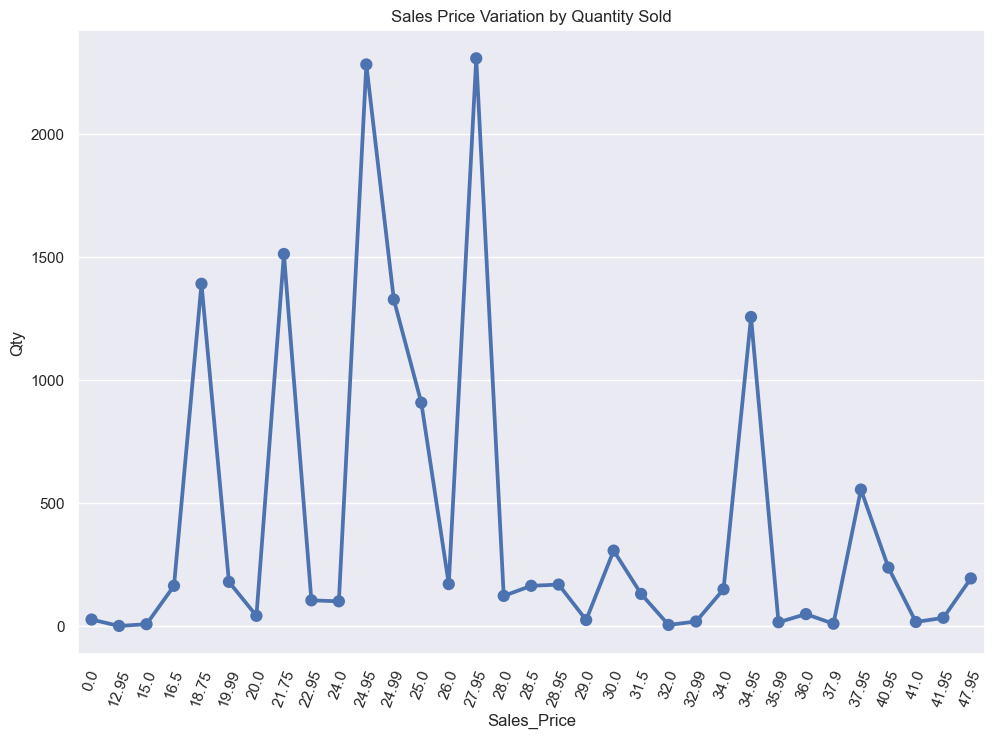

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Create the plot
sns.pointplot(data = sales, x ='Sales_Price', y ='Qty')
# Add a title, ticks
plt.title('Sales Price Variation by Quantity Sold')
plt.xticks(rotation = 70)
# Show the plot
plt.show()
#https://seaborn.pydata.org/generated/seaborn.pointplot.html

In [148]:
# Setting the kits in order of most sold
products = df_biz.groupby('Product_ID')['Qty'].sum().reset_index()
products = products.sort_values(by= 'Qty', ascending = False)
products

,Product_ID,Qty
2,FireWrap® Grip Kit Black,3763.0
8,FireWrap® Grip Kit Red,3313.0
3,FireWrap® Grip Kit Blue,1726.0
7,FireWrap® Grip Kit Orange,1235.0
10,FireWrap® Grip Kit Yellow,1081.0
6,FireWrap® Grip Kit Green,907.0
5,FireWrap® Grip Kit GLOW - Green ( 927 ),821.0
4,FireWrap® Grip Kit GLOW - Aqua,781.0
9,FireWrap® Grip Kit White,323.0
0,FireWrap Grip Kit - Light Blue,21.0


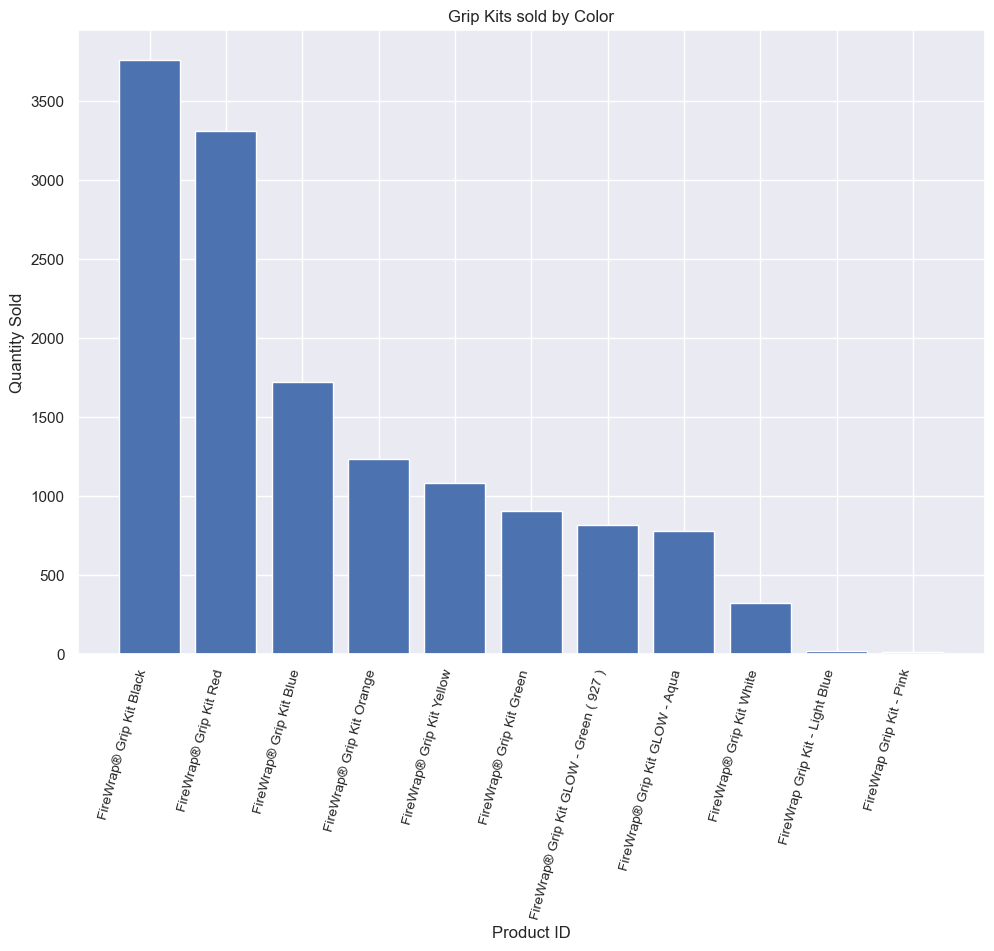

In [149]:
# Visual for sales... IN ORDER!
import matplotlib.pyplot as plt

# Create a bar chart that shows sales IN ORDER!
plt.bar(products['Product_ID'], products['Qty'])
fig = plt.figsize=(20,10)
plt.xlabel('Product ID')
plt.xticks(rotation = 75, fontsize = 10, ha= 'right')
plt.ylabel('Quantity Sold')
plt.title('Grip Kits sold by Color')

# Show the chart
plt.show()

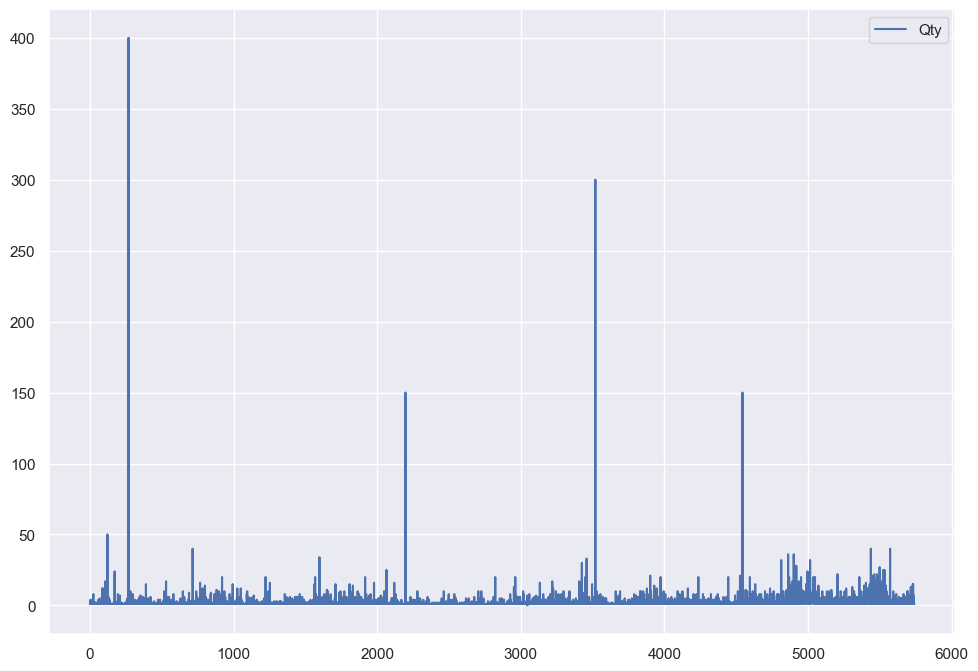

In [150]:
# Plot the time series of Qty
df_biz.plot(y = 'Qty')
plt.show()

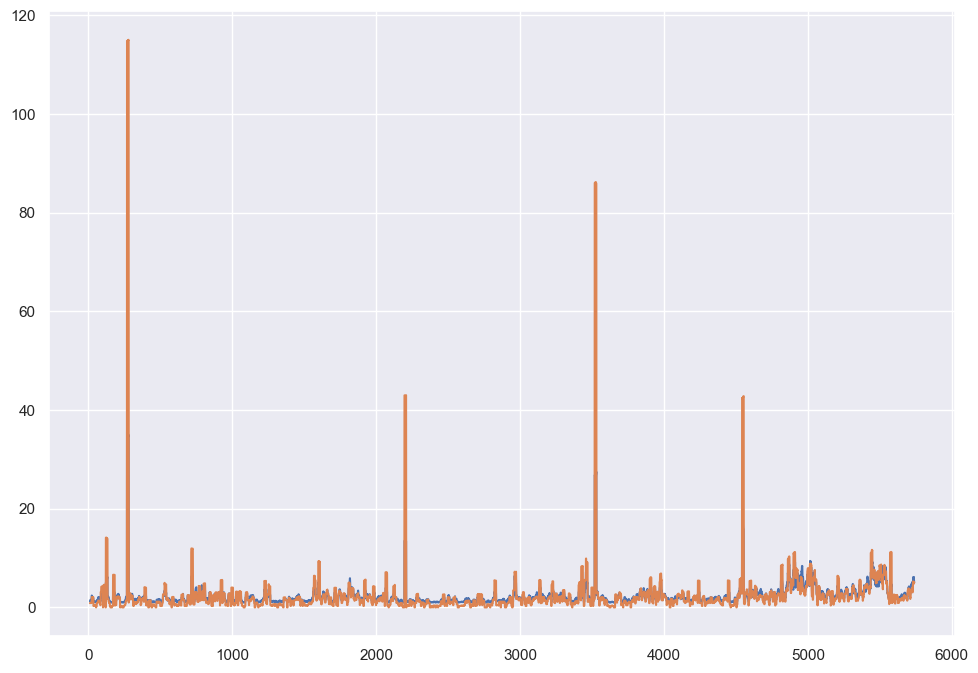

In [151]:
# Plot the rolling mean and rolling standard deviation of the 'Qty' column
df_biz['Qty'].rolling(window=12).mean().plot()
df_biz['Qty'].rolling(window=12).std().plot()
plt.show()

In [153]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_biz['Qty'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#https://machinelearningmastery.com/time-series-data-stationary-python/

ADF Statistic: -73.642596
p-value: 0.000000


A negative ADF statistic value, in this case -76, indicates that the time series is very likely to be stationary. This is because, in the ADF test, the null hypothesis is that there is a unit root (non-stationarity) in the time series, and a low p-value (typically less than 0.05) is used to reject the null hypothesis and conclude the time series is stationary.

There is the occasional large that represents the single large orders, other than that the data looks sationary which is backed up by our two different AdFuller test and visuals.

P,D, Q
Another important aspect we will have to address soon is the parameter for the SARIMA time-series, which are denoted with 'P', 'D', and 'Q'. With the results of this ADFuller test we can assume our D paramter will be set to 0. The parameters are represented as follows:

p: is the order of the autoregressive term (AR), which is the number of lags used in the model. It describes the number of past values used to predict the next value.
d: is the order of the differencing term (I), which is used to make the time series stationary by removing trends or seasonality. It represents the number of times the data has been differenced.
q: is the order of the moving average term (MA), which is the error term that captures the short-term fluctuations in the data. It represents the number of past forecast errors used to predict the next value. The 'S' in SARIMA represents the seasonality aspect of the model, usually the notation is 'SARIMA(p,d,q)(P,D,Q)m' with 'm' being a constant such as 12(months).
***

To find these values I will perform a GridSearch, but first a few last things with our dataframe. A key component of a time-series model is converting the table to 'DateTimeIndex' which makes the 'Date' column the index and lets us use the date's frequency information in our models.

In [154]:
# Data is stationary, changing to date time index.
# Convert the 'Date' column to a datetime object
df_biz['Date'] = pd.to_datetime(df_biz['Date'])

# Set the 'Date' column as the DataFrame index
df_biz.set_index('Date', inplace=True)

In [155]:
df_biz.head()

,Product_ID,Transaction Type,Qty,Sales_Price,Amount
Date,,,,,
2018-03-23,FireWrap Grip Kit - Light Blue,Sales Receipt,1.0,24.95,24.95
2018-04-26,FireWrap Grip Kit - Light Blue,Sales Receipt,1.0,24.95,24.95
2018-04-27,FireWrap Grip Kit - Light Blue,Sales Receipt,1.0,24.95,24.95
2018-05-14,FireWrap Grip Kit - Light Blue,Sales Receipt,1.0,34.95,34.95
2018-06-22,FireWrap Grip Kit - Light Blue,Invoice,4.0,26.00,104.00


I will use the 'bfill' attribute which should fill missing values with the last valid observation and helps maintain integrity of the data when going through the model. We will also resample the table so that it is formatted to weeks instead of months which I think is better for this sized dataset.

In [157]:
# The term bfill means that we use the value before filling in missing values
df_biz_model= df_biz.fillna(df_biz.bfill())

df_biz_model

,Product_ID,Transaction Type,Qty,Sales_Price,Amount
Date,,,,,
2018-03-23,FireWrap Grip Kit - Light Blue,Sales Receipt,1.0,24.95,24.95
2018-04-26,FireWrap Grip Kit - Light Blue,Sales Receipt,1.0,24.95,24.95
2018-04-27,FireWrap Grip Kit - Light Blue,Sales Receipt,1.0,24.95,24.95
2018-05-14,FireWrap Grip Kit - Light Blue,Sales Receipt,1.0,34.95,34.95
2018-06-22,FireWrap Grip Kit - Light Blue,Invoice,4.0,26.00,104.00
...,...,...,...,...,...
2022-11-28,FireWrap® Grip Kit Yellow,Invoice,7.0,21.75,152.25
2022-12-06,FireWrap® Grip Kit Yellow,Invoice,6.0,27.95,167.70
2022-12-12,FireWrap® Grip Kit Yellow,Invoice,5.0,21.75,108.75


In [158]:
# Resampling to the data into groups by weeks starting on Saturday...
df_biz_weekly = df_biz_model.resample('W-SAT')
weekly_mean = df_biz_weekly.mean()
weekly_mean

,Qty,Sales_Price
Date,,
2018-03-24,1.687500,26.575000
2018-03-31,1.000000,27.550000
2018-04-07,1.181818,27.313636
2018-04-14,1.235294,28.773529
2018-04-21,1.300000,26.355000
...,...,...
2022-12-17,2.723077,28.057692
2022-12-24,2.586207,30.743103
2022-12-31,1.543860,27.897368


Models:
We now have our data set up to where we can work with it, finally. This brings us to the meat and potatoes portion of the project, the modelling. To begin we need to identify our parameters which will be done via grid search, after that we will fit them to the model which will allow us to make predictions and evaluate. To give us a better idea of how the SARIMA model works, here is a brief summary:

SARIMA (Seasonal AutoRegressive Integrated Moving Average) models are a type of time series forecasting models that are used to model and predict future values based on past observations. They are an extension of the standard ARIMA (AutoRegressive Integrated Moving Average) models that include a seasonal component.

The basic structure of a SARIMA model is composed of three components:

AutoRegressive (AR) component: This component models the relationship between an observation and a number of lagged observations. It's represented by the parameter "p" in the SARIMA model.

Integrated (I) component: This component models the relationship between the observations and the differences between consecutive observations. It's represented by the parameter "d" in the SARIMA model.

Moving Average (MA) component: This component models the relationship between the observations and the error term (i.e. the difference between the actual observation and the prediction). It's represented by the parameter "q" in the SARIMA model.

Seasonal component: This component models the relationship between the observation and the lagged observations at the same time of the year. It's represented by the parameter "P", "D", and "Q" in the SARIMA model. These parameters of the model we will try to find by performing a grid search over different combinations of parameters.

Once the parameters are chosen, the model is trained on a set of historical data, and used to make predictions about future values. The model takes into account both the trend and the seasonality of the data.

https://neptune.ai/blog/arima-sarima-real-world-time-series-forecasting-guide
Regularization Measure
The Bayesian Information Criterion (BIC) is a measure of the relative quality of statistical models. It is commonly used in the field of time series analysis to compare the quality of different models. BIC is a trade-off between the goodness of fit of the model and the complexity of the model. The lower the BIC score, the better the model fit is, and the simpler the model is.

The Models
As mentioned we will run a time-series models. The reason for doing this goes back to the original business problem. The owner does not want to be short on supplies but also does not want to take up unneeded shop space. We will begin by splitting the data into a train and test set and then use a grid search function on the test to get the parameters for the model and then begin fitting and predicting.

In [160]:
#importing libraries to be used in model building
import statsmodels.api as sm
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from statsmodels.tsa.seasonal import seasonal_decompose 

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

from tqdm import tqdm_notebook
from itertools import product

%matplotlib inline

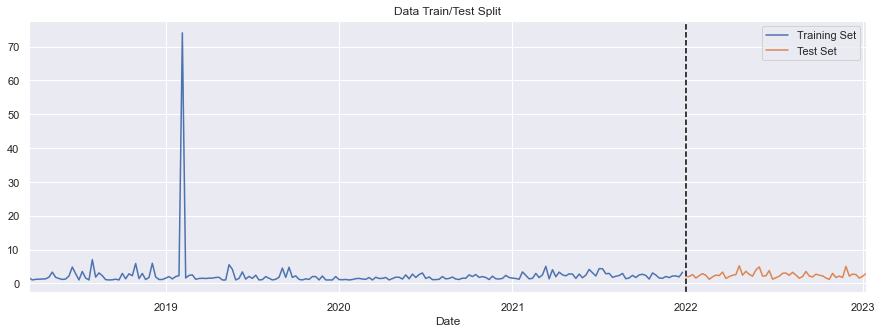

In [163]:
# split data into 80/20 test by dates..
train_biz = weekly_mean['Qty'].loc[weekly_mean.index < '01-01-2022']
test_biz = weekly_mean['Qty'].loc[weekly_mean.index >= '01-01-2022']

fig, ax = plt.subplots(figsize=(15, 5))
train_biz.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test_biz.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2022', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [172]:
# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 52 in the 's' position as we have weekly data
pdqs = [(x[0], x[1], x[2], 51) for x in list(itertools.product(p, d, q))]

In [176]:
sarimax_gridsearch(train_biz, pdq, pdqs, freq='W-SAT')

SARIMAX (0, 0, 0) x (0, 0, 0, 51) : BIC Calculated =1246.706296011646
SARIMAX (0, 0, 0) x (0, 0, 1, 51) : BIC Calculated =5950.66880062656
SARIMAX (0, 0, 0) x (0, 1, 0, 51) : BIC Calculated =946.7790374138091
SARIMAX (0, 0, 0) x (0, 1, 1, 51) : BIC Calculated =305.40412683689453
SARIMAX (0, 0, 0) x (1, 0, 0, 51) : BIC Calculated =635.0048207528837
SARIMAX (0, 0, 0) x (1, 0, 1, 51) : BIC Calculated =5536.257356891926
SARIMAX (0, 0, 0) x (1, 1, 0, 51) : BIC Calculated =307.65138577739924
SARIMAX (0, 0, 0) x (1, 1, 1, 51) : BIC Calculated =308.6353959210305
SARIMAX (0, 0, 1) x (0, 0, 0, 51) : BIC Calculated =1242.4169289343197
SARIMAX (0, 0, 1) x (0, 0, 1, 51) : BIC Calculated =5557.379515334836
SARIMAX (0, 0, 1) x (0, 1, 0, 51) : BIC Calculated =946.1087742695651
SARIMAX (0, 0, 1) x (0, 1, 1, 51) : BIC Calculated =302.8482306047317
SARIMAX (0, 0, 1) x (1, 0, 0, 51) : BIC Calculated =565.9947818235948
SARIMAX (0, 0, 1) x (1, 0, 1, 51) : BIC Calculated =4777.61436154731
SARIMAX (0, 0, 1) x

,pdq,pdqs,bic
31,"(0, 1, 1)","(1, 1, 1, 51)",294.170303
30,"(0, 1, 1)","(1, 1, 0, 51)",295.312705
62,"(1, 1, 1)","(1, 1, 0, 51)",297.123374
27,"(0, 1, 1)","(0, 1, 1, 51)",297.719120
43,"(1, 0, 1)","(0, 1, 1, 51)",298.297648


In [175]:
import pandas as pd
import statsmodels.api as sm

def sarimax_gridsearch(ts, pdq, pdqs, maxiter=50, freq='W-SAT'):
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts,
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                freq=freq
                                                )
                output = mod.fit(maxiter=maxiter)
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {} : BIC Calculated ={}'.format(comb, combs, output.bic))
            except Exception as e:
                print('Error with combination:', comb, combs, 'Error:', e)
                continue
            
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])
    ans_df = ans_df.sort_values(by=['bic'], ascending=True)[0:5]
    
    return ans_df


In [178]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(train_biz, 
                                        order=(0,1,1), 
                                        seasonal_order=(0,1,1, 51), 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9709      0.101     -9.588      0.000      -1.169      -0.772
ma.S.L51      -0.1024      0.125     -0.822      0.411      -0.347       0.142
sigma2        38.6781      1.387     27.889      0.000      35.960      41.396


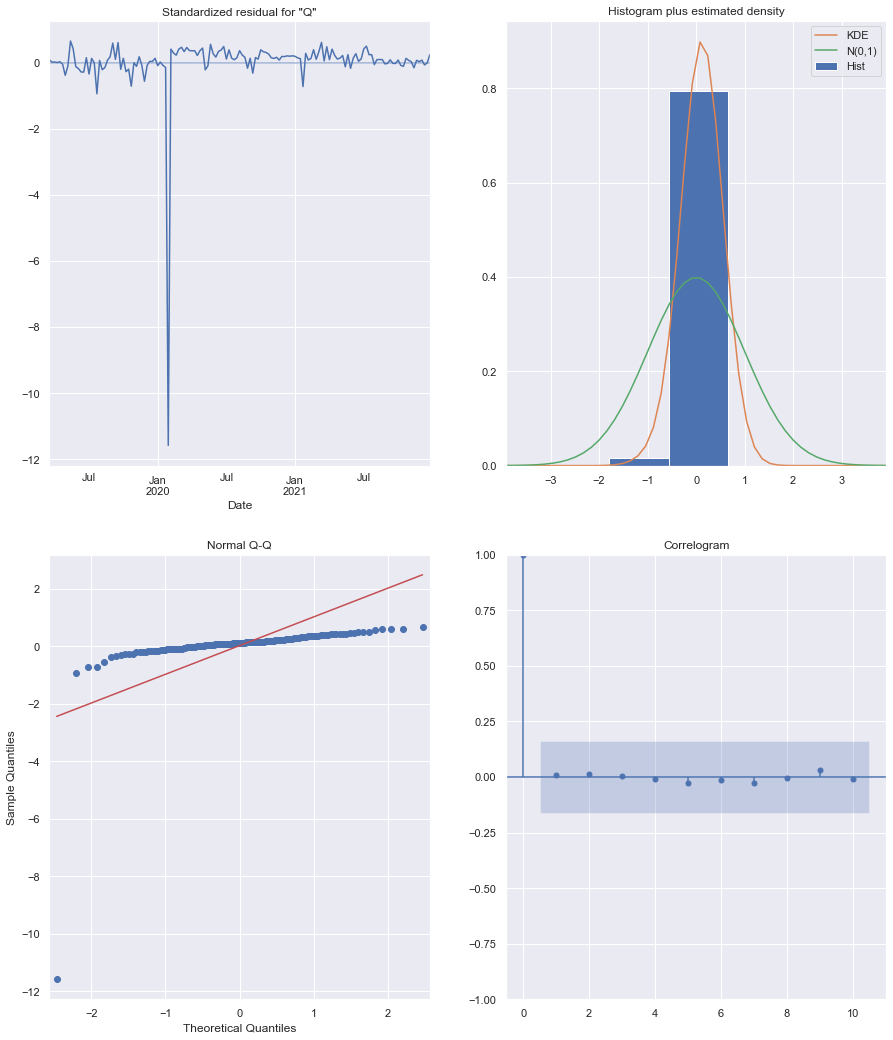

In [179]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

<AxesSubplot:xlabel='Date'>

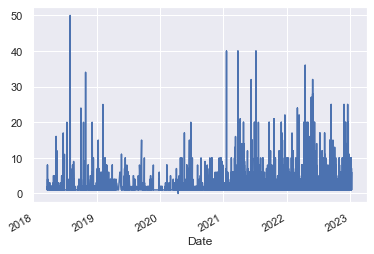

In [195]:
df_biz_outlier = df_biz[df_biz['Qty']<=100]
df_biz_outlier['Qty'].plot()

In [196]:
# Resampling to the data into groups by weeks starting on Saturday...
df_weekly_outlier = df_biz_outlier.resample('W-SAT')
weekly_mean_outlier = df_weekly_outlier.mean()
weekly_mean_outlier

,Qty,Sales_Price
Date,,
2018-03-24,1.687500,26.575000
2018-03-31,1.000000,27.550000
2018-04-07,1.181818,27.313636
2018-04-14,1.235294,28.773529
2018-04-21,1.300000,26.355000
...,...,...
2022-12-17,2.723077,28.057692
2022-12-24,2.586207,30.743103
2022-12-31,1.543860,27.897368


In [197]:
weekly_mean_outlier = weekly_mean_outlier.fillna(weekly_mean_outlier.bfill())


<AxesSubplot:xlabel='Date'>

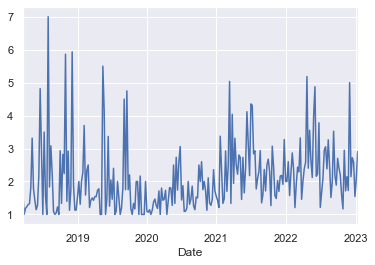

In [198]:
weekly_mean_outlier['Qty'].plot()


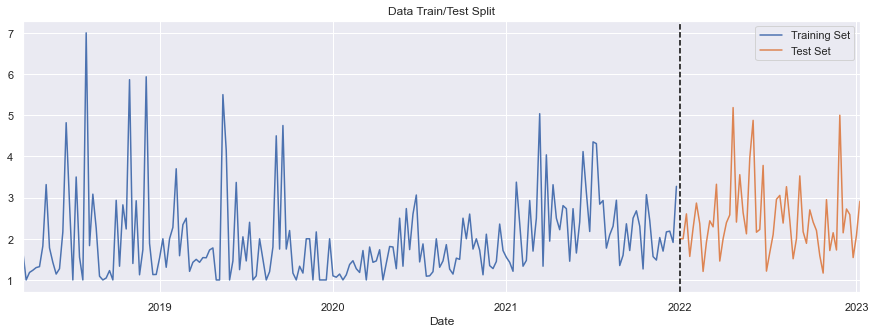

In [199]:
# split data into 80/20 test by dates..
train_outlier= weekly_mean_outlier['Qty'].loc[weekly_mean_outlier.index < '01-01-2022']
test_outlier = weekly_mean_outlier['Qty'].loc[weekly_mean_outlier.index >= '01-01-2022']

fig, ax = plt.subplots(figsize=(15, 5))
train_outlier.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test_outlier.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2022', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [200]:
import pandas as pd
import statsmodels.api as sm

def sarimax_gridsearch(ts, pdq, pdqs, maxiter=50, freq='W-SAT'):
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts,
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                freq=freq
                                                )
                output = mod.fit(maxiter=maxiter)
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {} : BIC Calculated ={}'.format(comb, combs, output.bic))
            except Exception as e:
                print('Error with combination:', comb, combs, 'Error:', e)
                continue
            
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])
    ans_df = ans_df.sort_values(by=['bic'], ascending=True)[0:5]
    
    return ans_df

In [201]:
sarimax_gridsearch(train_outlier, pdq, pdqs, freq='W-SAT')

SARIMAX (0, 0, 0) x (0, 0, 0, 51) : BIC Calculated =879.2275325513729
SARIMAX (0, 0, 0) x (0, 0, 1, 51) : BIC Calculated =6227.9170561241035
SARIMAX (0, 0, 0) x (0, 1, 0, 51) : BIC Calculated =524.3891124213662
SARIMAX (0, 0, 0) x (0, 1, 1, 51) : BIC Calculated =284.75351225513134
SARIMAX (0, 0, 0) x (1, 0, 0, 51) : BIC Calculated =516.1168772853546
SARIMAX (0, 0, 0) x (1, 0, 1, 51) : BIC Calculated =5953.865598793898
SARIMAX (0, 0, 0) x (1, 1, 0, 51) : BIC Calculated =291.3246020707876
SARIMAX (0, 0, 0) x (1, 1, 1, 51) : BIC Calculated =293.8059663113724
SARIMAX (0, 0, 1) x (0, 0, 0, 51) : BIC Calculated =785.0382288494981
SARIMAX (0, 0, 1) x (0, 0, 1, 51) : BIC Calculated =5040.563903579988
SARIMAX (0, 0, 1) x (0, 1, 0, 51) : BIC Calculated =521.2194440943506
SARIMAX (0, 0, 1) x (0, 1, 1, 51) : BIC Calculated =283.60167715876366
SARIMAX (0, 0, 1) x (1, 0, 0, 51) : BIC Calculated =506.1543865986851
SARIMAX (0, 0, 1) x (1, 0, 1, 51) : BIC Calculated =4680.504979974978
SARIMAX (0, 0, 1)

,pdq,pdqs,bic
27,"(0, 1, 1)","(0, 1, 1, 51)",268.919733
59,"(1, 1, 1)","(0, 1, 1, 51)",273.421694
43,"(1, 0, 1)","(0, 1, 1, 51)",274.911635
31,"(0, 1, 1)","(1, 1, 1, 51)",275.690166
30,"(0, 1, 1)","(1, 1, 0, 51)",276.954530


In [202]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(train_outlier, 
                                        order=(0,1,1), 
                                        seasonal_order=(0,1,1, 51), 
                                        enforce_invertibility=False)

# Fit the model and print results
output_2 = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9590      0.078    -12.295      0.000      -1.112      -0.806
ma.S.L51      -0.1792      0.073     -2.464      0.014      -0.322      -0.037
sigma2        17.4839      0.508     34.429      0.000      16.489      18.479


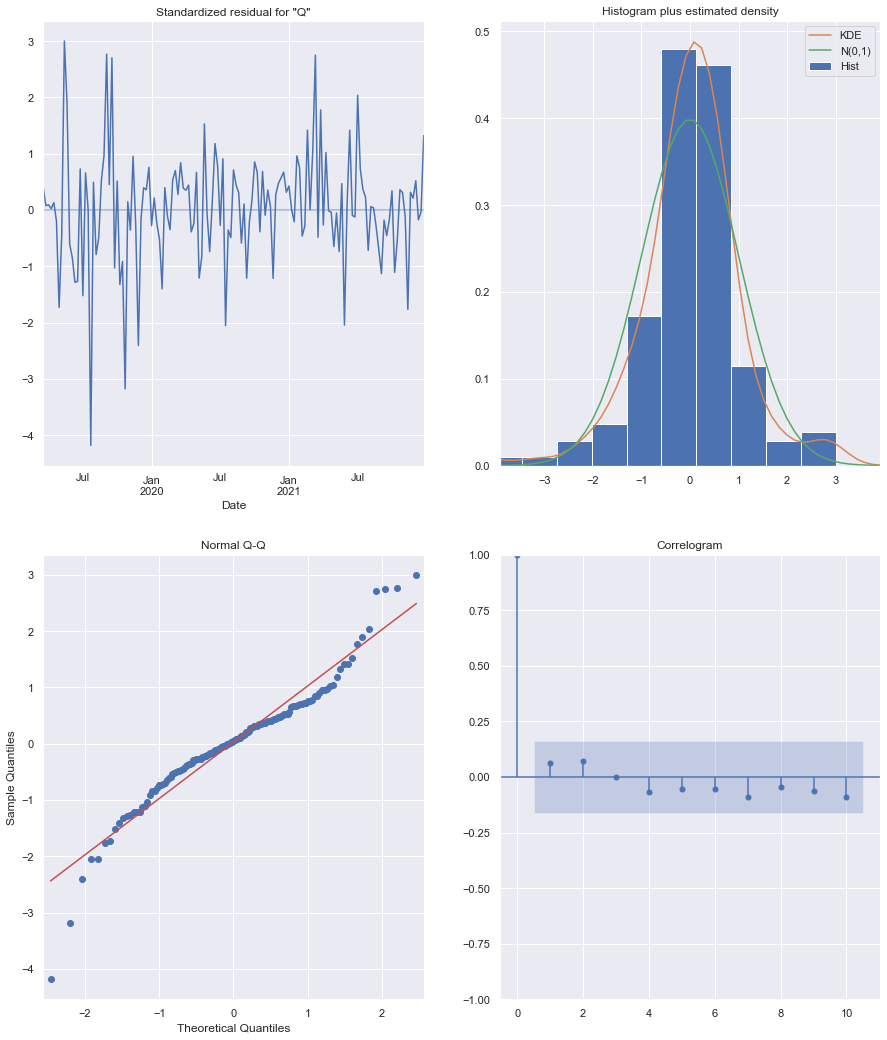

In [203]:
# Call plot_diagnostics() on the results calculated above 
output_2.plot_diagnostics(figsize=(15, 18))
plt.show()

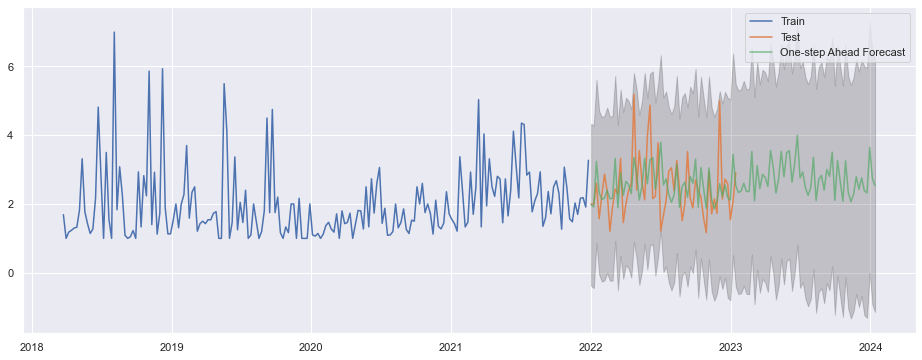

In [209]:
# Get the predicted values
pred = output_2.get_prediction(start=pd.to_datetime('01-01-2022'), end=pd.to_datetime('01-11-2024'), dynamic=False)
pred_conf = pred.conf_int()

# Plot the actual values and predicted values
plt.figure(figsize=(16, 6)) 
plt.plot(train_outlier, label='Train')
plt.plot(test_outlier, label='Test')
plt.plot(pred.predicted_mean, label='One-step Ahead Forecast', alpha=.7)

# Shade the area between the confidence intervals
plt.fill_between(pred_conf.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='k', alpha=.2)

plt.legend()
plt.show()

In [212]:
pred = output_2.get_prediction(start=pd.to_datetime('01-01-2022'), end=pd.to_datetime('01-11-2024'), dynamic=False)
pred_mean = pred.predicted_mean
print('One Step Ahead')
print('Predicted Weekly Mean of Quantity Sold')
print(pred_mean2.tail())
print('*****')
pred_conf2 = pred2.conf_int()
print('Confidence Interval:')
print(pred_conf2.tail())
print('*****')
print(pred_mean2.describe())

One Step Ahead
Predicted Weekly Mean of Quantity Sold
2023-12-16    2.384234
2023-12-23    2.323122
2023-12-30    3.644494
2024-01-06    2.738996
2024-01-13    2.539155
Freq: W-SAT, Name: predicted_mean, dtype: float64
*****
Confidence Interval:
            lower Qty  upper Qty
2023-12-16  -1.234674   6.003142
2023-12-23  -1.311411   5.957654
2023-12-30  -0.005596   7.294584
2024-01-06  -0.926585   6.404578
2024-01-13  -1.141853   6.220164
*****
count    107.000000
mean       2.649784
std        0.498495
min        1.862035
25%        2.270758
50%        2.557417
75%        2.988900
max        3.999040
Name: predicted_mean, dtype: float64


In [213]:
# Get the real and predicted values
Qty_forecasted = pred.predicted_mean
Qty_truth = test_outlier['2022-01-01':]

# Compute the mean square error
mse = ((Qty_forecasted - Qty_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.79
